In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings ('ignore')
import plotly.express as px
import seaborn as sns
import sklearn

UNSUPERVISED LEARNING: KMEANS CLUSTERING

GET DATA

In [25]:
data = pd.read_csv('Mall_Customers (3).csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
# - Rename the features for ease of reference
data= data.rename(columns = {'Spending Score (1-100)': 'Score', 'Annual Income (k$)': 'Income', 'CustomerID': 'ID'})
data.head()

,ID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


ASCERTAIN IMPORTANT CUSTOMERS BASED ON THEIR INCOME AND FREQUENCY OF PURCHASE 

In [27]:
#Business Problem:  Cluster customers according to Income and Spending Score

data = data[['Income','Score']]
data.head()

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


ASCERTAIN REQUIRED NUMBER OF CLUSTERS VIA YELLOWBRICK

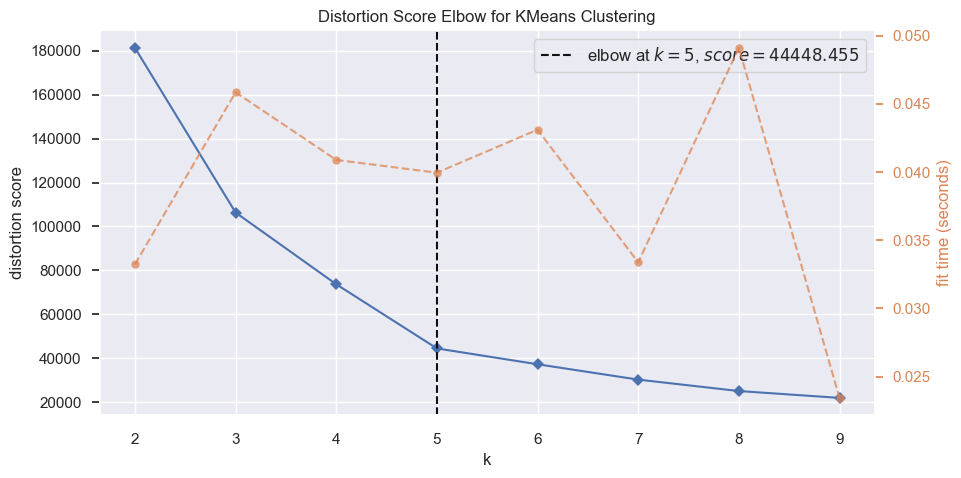

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
#install yellowbrick to vizualize the Elbow curve
#!pip install yellowbrick  --q

# ascertain the number of clusters to use
from sklearn.cluster import KMeans # ------------------------------------------- Instantiate the KMeans algorithm
from yellowbrick.cluster import KElbowVisualizer # ----------------------------- Instantiate the plotting library

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

plt.figure(figsize = (10, 5))
visualizer.fit(data) #............................................................. Fit the data to the visualizer
visualizer.show() #............................................................. Finalize and render the figure


KMEANS ALGORITHM : CLUSTERING ALGORITHM

In [29]:
from sklearn.cluster import KMeans # ------------------------------------------- Instantiate the KMeans algorithm

km = KMeans(n_clusters = 5,    # ............................................... number of clusters we want
            init = 'k-means++',
            n_init = 10,
            max_iter = 100,
            random_state = 42)

clusters_predict = km.fit_predict(data) # ......................................... we fit the Kmeans algorithm on the data
data['Clusters'] = clusters_predict # ............................................. we create a new column for the cluster class
data

,Income,Score,Clusters
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


INTERPRETATION OF CLUSTERS

Text(0.5, 1.0, 'Customer Cluster Visualization')

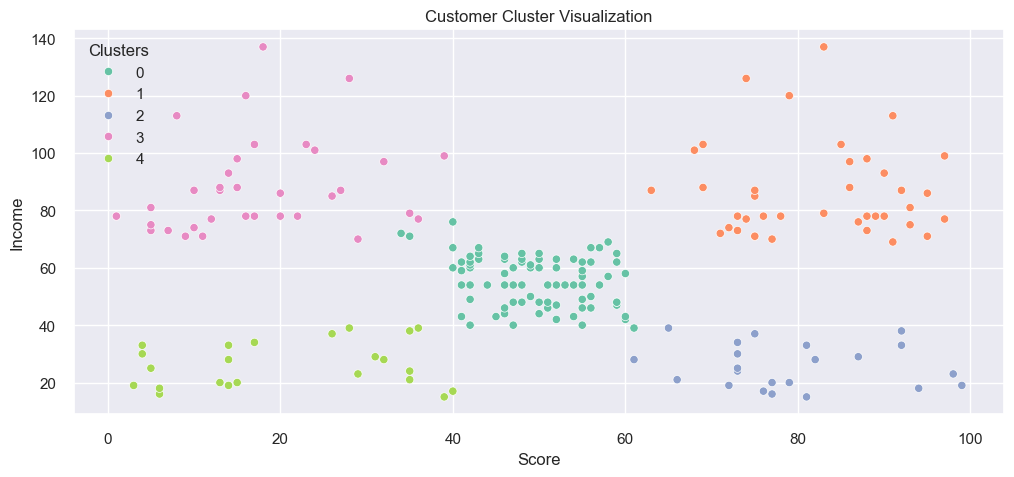

In [30]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (12, 5))
sns.scatterplot(x = data['Score'], y = data['Income'], hue = data['Clusters'], palette = 'Set2')
plt.title('Customer Cluster Visualization')

,Income,Score,Clusters,ClusterInterprete
0,15,39,4,LwInc_LwSpend
1,15,81,2,LwInc_HiSpend
2,16,6,4,LwInc_LwSpend
3,16,77,2,LwInc_HiSpend
4,17,40,4,LwInc_LwSpend
...,...,...,...,...
195,120,79,1,HiInc_HiSpend
196,126,28,3,HiInc_LowSpend
197,126,74,1,HiInc_HiSpend
198,137,18,3,HiInc_LowSpend


<Axes: xlabel='Clusters', ylabel='Count'>

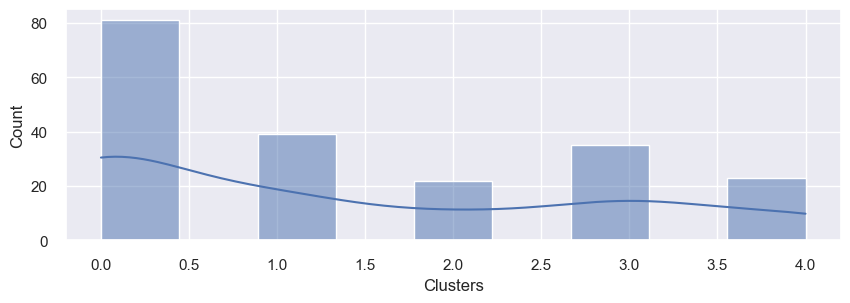

In [31]:
data['ClusterInterprete'] = data.Clusters.map({2: 'LwInc_HiSpend',
                               3: 'HiInc_LowSpend',
                               4: 'LwInc_LwSpend',
                               1: 'HiInc_HiSpend',
                               0: 'MidInc_MidSpend'})

display(data)

plt.figure(figsize = (10,3))
sns.histplot(data.Clusters, kde = True)

In [32]:

data.loc[data['ClusterInterprete'] == 'LwInc_LwSpend'].shape

(23, 4)

In [33]:
data.head()

,Income,Score,Clusters,ClusterInterprete
0,15,39,4,LwInc_LwSpend
1,15,81,2,LwInc_HiSpend
2,16,6,4,LwInc_LwSpend
3,16,77,2,LwInc_HiSpend
4,17,40,4,LwInc_LwSpend


In [34]:
data.Clusters.unique()

array([4, 2, 0, 1, 3])

In [35]:
from sklearn.model_selection import train_test_split

x = data.drop(['Clusters','ClusterInterprete'], axis = 1)
y = data.Clusters


xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.80, random_state = 10) # SYNTHAX TO SPLIT INTO  TRAIN AND TEST FOR MACHINE LEARNING

print(f'xtrain: {xtrain.shape}')
print(f'xtest: {xtest.shape}')
print('ytrain: {}'.format(ytrain.shape))
print('ytest: {}'.format(ytest.shape))

xtrain: (160, 2)
xtest: (40, 2)
ytrain: (160,)
ytest: (40,)


In [36]:
def modeller(x_train, y_train, x_test, y_test, show_train_score = None):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from xgboost import XGBClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score
    
    # list of algorithms to be used
    algorithms = [RandomForestClassifier(), XGBClassifier(), DecisionTreeClassifier(), SVC(kernel = "poly"), LogisticRegression()]

    # keep the training and test scores
    scores = []
    train_validator = []

    for i in algorithms:
        model_name = i
        model_name.fit(xtrain, ytrain)
        model_validate = model_name.predict(xtrain)
        train_validator.append(accuracy_score(model_validate, ytrain))

        test_perf = model_name.predict( xtest)
        scores.append(accuracy_score(test_perf, ytest))

    # create a table for each algorithms and scores
    compare_table = pd.DataFrame()
    compare_table['Algorithm'] = pd.Series(algorithms)
    compare_table['Accuracy'] = pd.Series(scores)

    if show_train_score == 'show_train':
        compare_table['Training Accuracy'] = pd.Series(train_validator)
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]
    else:
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]

table, model1, model2 = modeller(xtrain, ytrain, xtest, ytest, show_train_score = 'show_train')
table

,Algorithm,Accuracy,Training Accuracy
1,"XGBClassifier(base_score=None, booster=None, c...",0.975,1.0
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.950,1.0
2,DecisionTreeClassifier(),0.950,1.0
3,SVC(kernel='poly'),0.950,1.0
4,LogisticRegression(),0.950,1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        20

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



<Axes: >

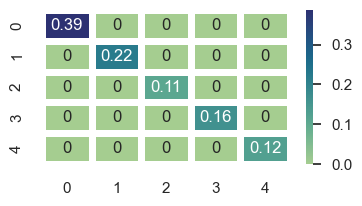

In [37]:
# MODELLING FOR RANDOMFOREST

from sklearn.metrics import confusion_matrix, classification_report

from xgboost import XGBClassifier

xg_model = XGBClassifier()
xg_model.fit(xtrain, ytrain)


# CROSS-VALIDATE THE MODEL
cross_val = xg_model.predict(xtrain)

# METRIC

print(classification_report(cross_val, ytrain))
#print(f'XGBoost Model Performance: {r2_score(cross_val, ytrain).round(2)}')

revealer = confusion_matrix(cross_val, ytrain)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [38]:
test_prediction = xg_model.predict(xtest) 
print(classification_report(test_prediction, ytest)) 


              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3

    accuracy                           0.97        40
   macro avg       0.95      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40



In [39]:
# serialise transformers and model
import joblib

#joblib.dump(enc, 'encoder.pkl') 
joblib.dump(xg_model, 'Kmeans_model.pkl') # to save your model to a file

['Kmeans_model.pkl']

In [40]:
# Load the model
imported_model = joblib.load('Kmeans_model.pkl')
imported_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [43]:
# new sample data to predict the customer clusters
new_clusters = data.sample(7).drop(['Clusters','ClusterInterprete'], axis = 1)
new_clusters

,Income,Score
19,23,98
122,69,58
85,54,46
133,72,71
120,67,56
62,47,52
135,73,88


In [44]:
# predict the sample data with the model
imported_model.predict(new_clusters)

array([2, 0, 0, 1, 0, 0, 1], dtype=int64)

In [45]:
# batch predict for the company, and save the predicted customer into a new column called predicted customer
new_clusters['predicted_clusters'] = imported_model.predict(new_clusters)
new_clusters

,Income,Score,predicted_clusters
19,23,98,2
122,69,58,0
85,54,46,0
133,72,71,1
120,67,56,0
62,47,52,0
135,73,88,1
